# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [40]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [41]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 579


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [42]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # pause for 1 second using time.sleep() which avoids the openweather api key from being disabled.
        time.sleep(1)
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        # go back to Monday's demo to see how to pull this info 11.18.24.
        
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | beyneu
Processing Record 2 of Set 1 | papatowai
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | siwa oasis
Processing Record 6 of Set 1 | ribeira grande
Processing Record 7 of Set 1 | chui
Processing Record 8 of Set 1 | cockburn town
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | solnechnyy
Processing Record 11 of Set 1 | at-bashi
Processing Record 12 of Set 1 | atafu village
Processing Record 13 of Set 1 | weno
Processing Record 14 of Set 1 | puerto natales
Processing Record 15 of Set 1 | kiskunhalas
Processing Record 16 of Set 1 | kavieng
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | tiksi
Processing Record 19 of Set 1 | blackmans bay
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | ilulissat
Processing Record 22 of Set 1 | isafjordur
Processing Record 23 of 

In [43]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [44]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,beyneu,45.3167,55.2000,62.11,50,100,10.20,KZ,1743652625
1,papatowai,-46.5619,169.4708,66.76,70,95,10.54,NZ,1743652627
2,albany,42.6001,-73.9662,36.52,92,100,3.00,US,1743652628
3,bethel,41.3712,-73.4140,42.01,86,100,3.00,US,1743652629
4,siwa oasis,29.2041,25.5195,61.84,47,0,7.14,EG,1743652630


In [45]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [46]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,beyneu,45.3167,55.2000,62.11,50,100,10.20,KZ,1743652625
1,papatowai,-46.5619,169.4708,66.76,70,95,10.54,NZ,1743652627
2,albany,42.6001,-73.9662,36.52,92,100,3.00,US,1743652628
3,bethel,41.3712,-73.4140,42.01,86,100,3.00,US,1743652629
4,siwa oasis,29.2041,25.5195,61.84,47,0,7.14,EG,1743652630


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

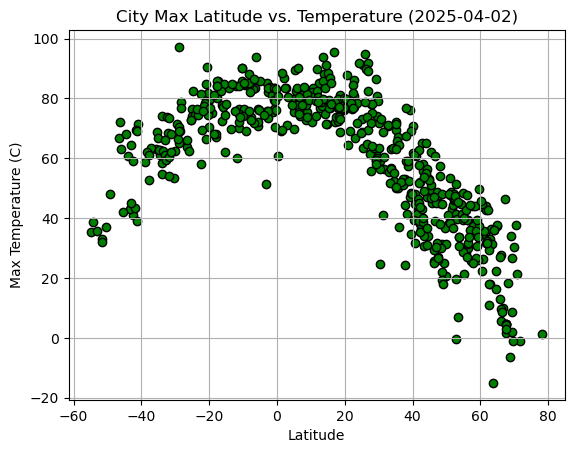

In [47]:
# Build scatter plot for latitude vs. temperature mka
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    color="green",
    edgecolor="black"
)
    

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot but make sure you use the correct date not what's shown below.
plt.show()

#### Latitude Vs. Humidity

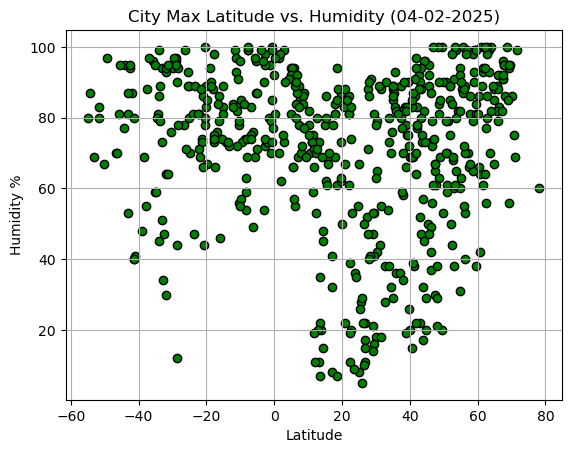

In [48]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    color="green",
    edgecolor="black"
)
    

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

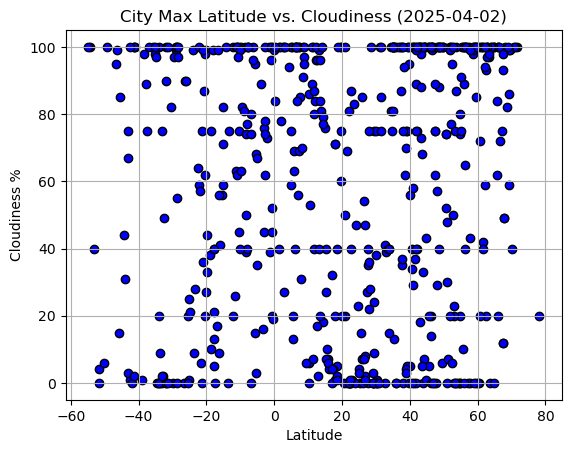

In [49]:
# Build the scatter plots for latitude vs. cloudiness. Use both columns
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    color="blue",
    edgecolor="black"
)
    

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

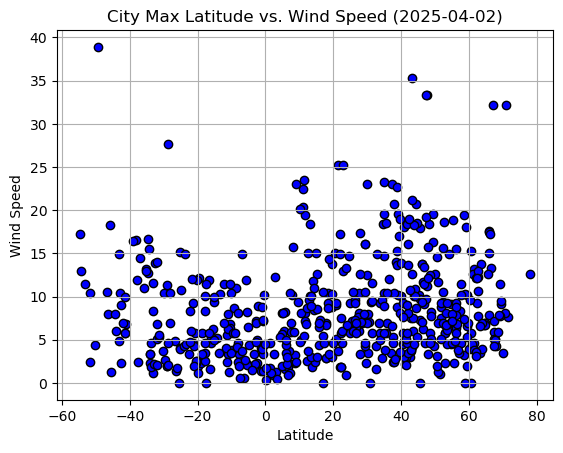

In [50]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    color="blue",
    edgecolor="black"
)
    

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig3.png")


# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [51]:
# Define a function to create Linear Regression plots
# Define a function to create Linear Regression plots
def regression_plot(x_values, y_values, x_label, y_label, annotation):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept 
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(rvalue)
    print(line_eq)

    # Change Canvas Size
    plt.figure(figsize=(12, 6))
    
    # Create a basic plot
    plt.scatter(x_values, y_values, color="green", edgecolor="black", s=200)
    plt.plot(x_values, regress_values, color="black", linewidth=6)
    
    # Customizations
    
    # Change colors
    # Add in reference lines
    # Add Labels/Title
    plt.xlabel(x_label, fontfamily="Arial", fontsize=12)
    plt.ylabel(y_label, fontfamily="Arial", fontsize=12)
    plt.title(f"{x_label} vs {y_label}", fontweight="bold", fontsize=16, fontfamily="Arial")
    
    # # Set X/Y Limits
    # plt.ylim(0, 90)
    # plt.xlim(-2, 75)
    
    # Add in a background grid
    plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
    
    
    # Annotate
    plt.annotate(line_eq, annotation, fontsize=15, color="black")
    
    # Show plot
    plt.show()

In [52]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df.Lat >=0].reset_index(drop=True)

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,beyneu,45.3167,55.2000,62.11,50,100,10.20,KZ,1743652625
1,albany,42.6001,-73.9662,36.52,92,100,3.00,US,1743652628
2,bethel,41.3712,-73.4140,42.01,86,100,3.00,US,1743652629
3,siwa oasis,29.2041,25.5195,61.84,47,0,7.14,EG,1743652630
4,ribeira grande,38.5167,-28.7000,58.77,83,62,14.00,PT,1743652631


In [53]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df.Lat <=0].reset_index(drop=True)

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,papatowai,-46.5619,169.4708,66.76,70,95,10.54,NZ,1743652627
1,chui,-33.6971,-53.4616,61.21,89,9,4.63,UY,1743652632
2,grytviken,-54.2811,-36.5092,38.62,87,100,12.97,GS,1743652635
3,atafu village,-8.5421,-172.5159,84.40,74,100,11.03,TK,1743652638
4,puerto natales,-51.7236,-72.4875,32.94,83,4,2.44,CL,1743652640


###  Temperature vs. Latitude Linear Regression Plot

-0.8723330750189241
y = -0.72x + 76.4


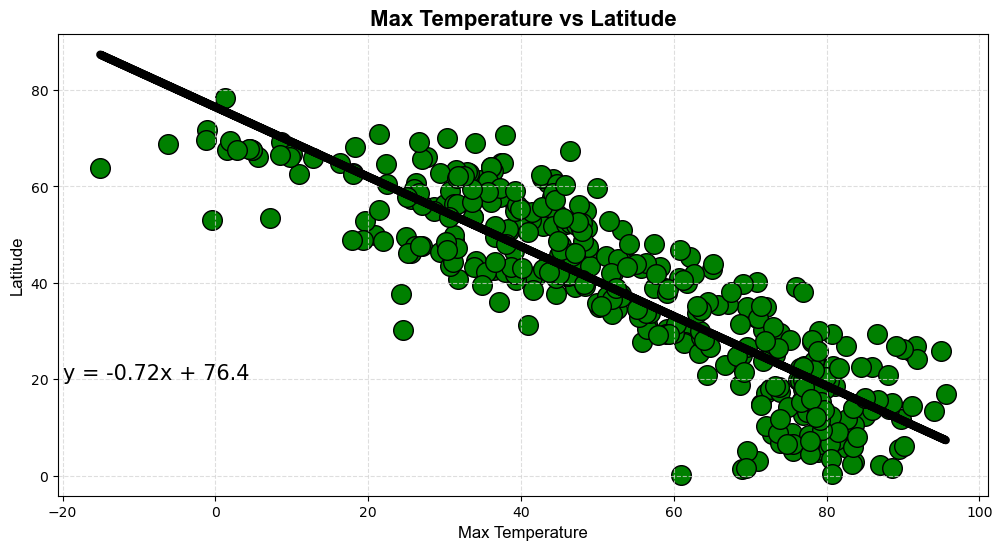

In [54]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Max Temp"]
y_values = northern_hemi_df.Lat
x_label = "Max Temperature"
y_label = "Latitude"
annotation = (-20, 20)

regression_plot(x_values, y_values, x_label, y_label, annotation)

0.726437809139696
y = 0.81x + -79.25


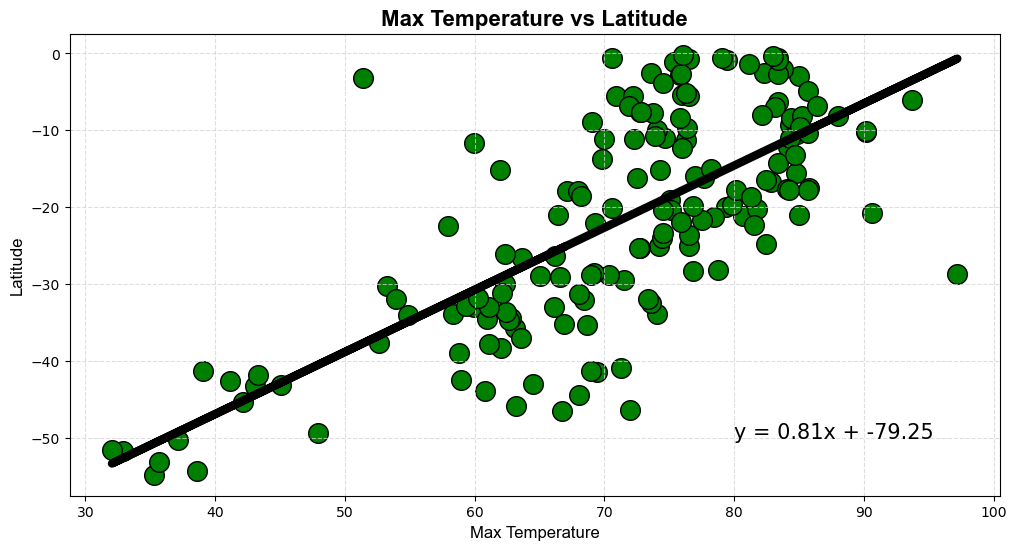

In [55]:
# Linear regression on Southern Hemisphere
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Max Temp"]
y_values = southern_hemi_df.Lat
x_label = "Max Temperature"
y_label = "Latitude"
annotation = (80, -50)

regression_plot(x_values, y_values, x_label, y_label, annotation)

**Discussion about the linear relationship:** In the southern Hempishere there seems to be a strong correlation between latitude and max temperature. The higher the latitude the higher the temperature as well. In the Northern hemisphere the correlation differs from the south. In the Northern hemispher there seems to be a downwards trend in temperature as the latitude gets lower.

### Humidity vs. Latitude Linear Regression Plot

0.22298832322768256
y = 0.17x + 25.53


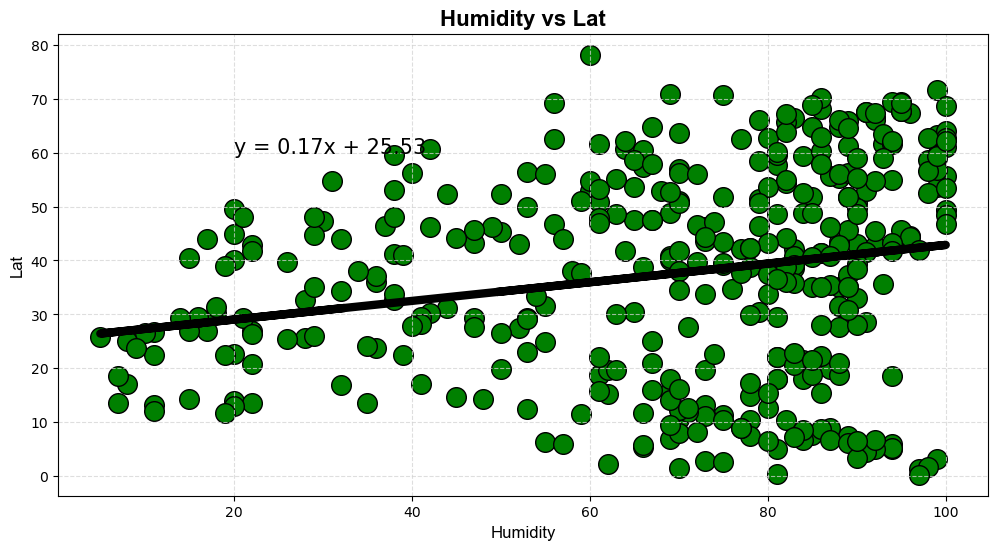

In [56]:
# Northern Hemisphere
x_values = northern_hemi_df.Humidity
y_values = northern_hemi_df.Lat
x_label = "Humidity"
y_label = "Lat"
annotation = (20, 60)

regression_plot(x_values, y_values, x_label, y_label, annotation)

0.12350354689652283
y = 0.11x + -30.13


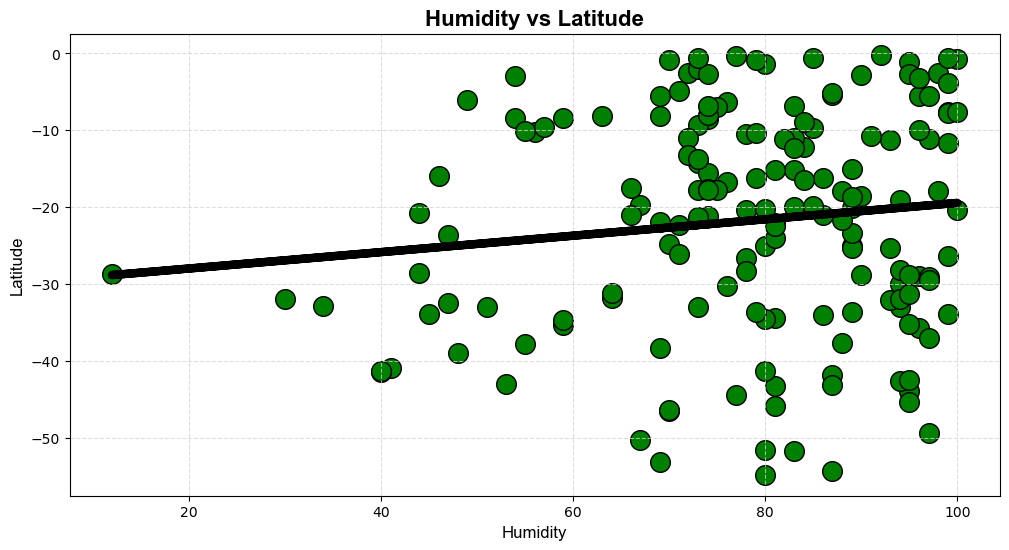

In [57]:
# Southern Hemisphere
x_values = southern_hemi_df.Humidity
y_values = southern_hemi_df.Lat
x_label = "Humidity"
y_label = "Latitude"
annotation = (5, -50)

regression_plot(x_values, y_values, x_label, y_label, annotation)

**Discussion about the linear relationship:** Amongst both graphs there is a marginal difference between the northern and southern hemisphere with itsd correlation to lattitude and humidity. Both graphs show a positive linear relationship, however in the northern hemisphere it shows a larger noticable increase in the humidity levels as the latitude increases. The same can not be said with the southern hemisphere as the increase is gradual and not in the same rate as the north.

### Cloudiness vs. Latitude Linear Regression Plot

0.1248291296853322
y = 0.06x + 33.88


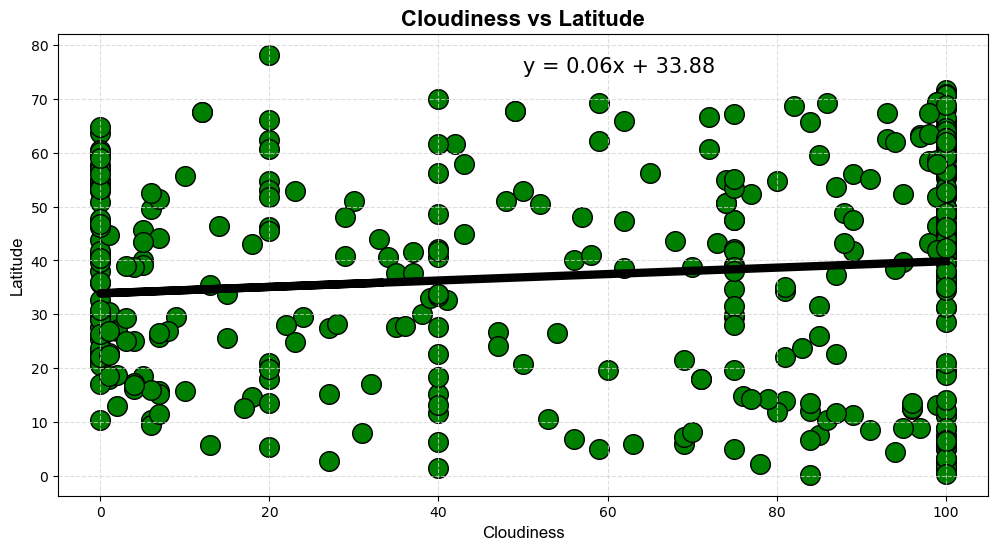

In [58]:
# Northern Hemisphere
x_values = northern_hemi_df.Cloudiness
y_values = northern_hemi_df.Lat
x_label = "Cloudiness"
y_label = "Latitude"
annotation = (50, 75)

regression_plot(x_values, y_values, x_label, y_label, annotation)

0.128143738168579
y = 0.05x + -24.57


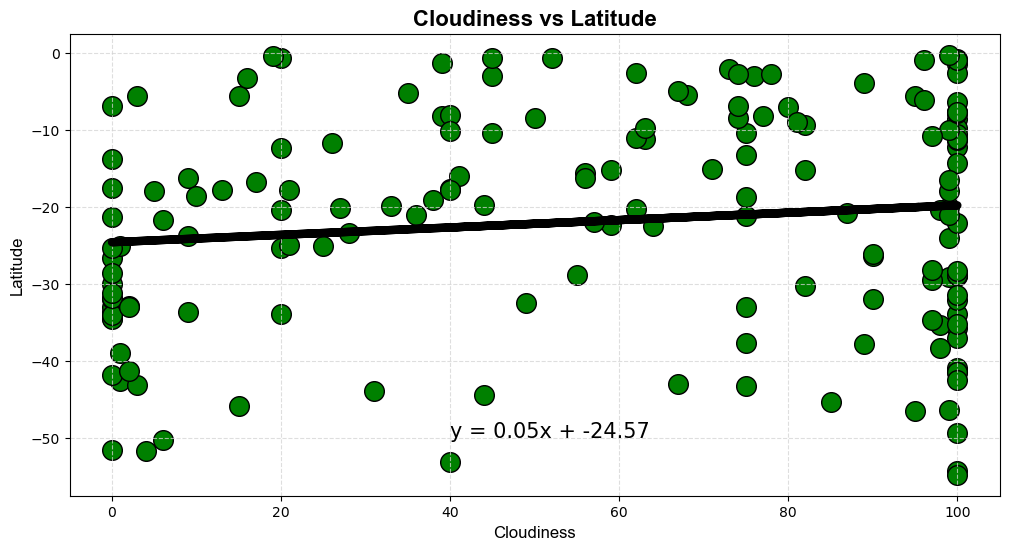

In [63]:
x_values = southern_hemi_df.Cloudiness
y_values = southern_hemi_df.Lat
x_label = "Cloudiness"
y_label = "Latitude"
annotation = (40, -50)

regression_plot(x_values, y_values, x_label, y_label, annotation)

**Discussion about the linear relationship:** Both the Northern and Southern Hemisphere exhibit a psotive linear relationship between cloudiness and latitude, with cloud cover generally rising as latitude increase. However, the strength of this relationship varies. In the north it showed stronger correlations with the increase of cloudiness to its latitude, whereas with the south it was a bit weaker with more gradual rises to its latitude.

### Wind Speed vs. Latitude Linear Regression Plot

0.13131688698579302
y = 0.42x + 33.67


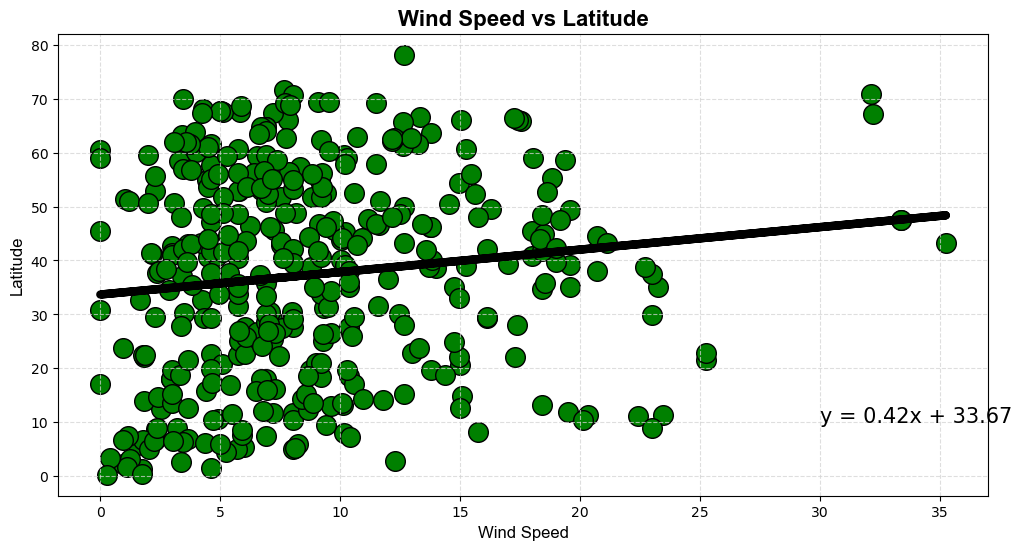

In [64]:
# Northern Hemisphere
x_values = northern_hemi_df["Wind Speed"]
y_values = northern_hemi_df.Lat
x_label = "Wind Speed"
y_label = "Latitude"
annotation = (30, 10)

regression_plot(x_values, y_values, x_label, y_label, annotation)

-0.337551757832246
y = -0.93x + -15.49


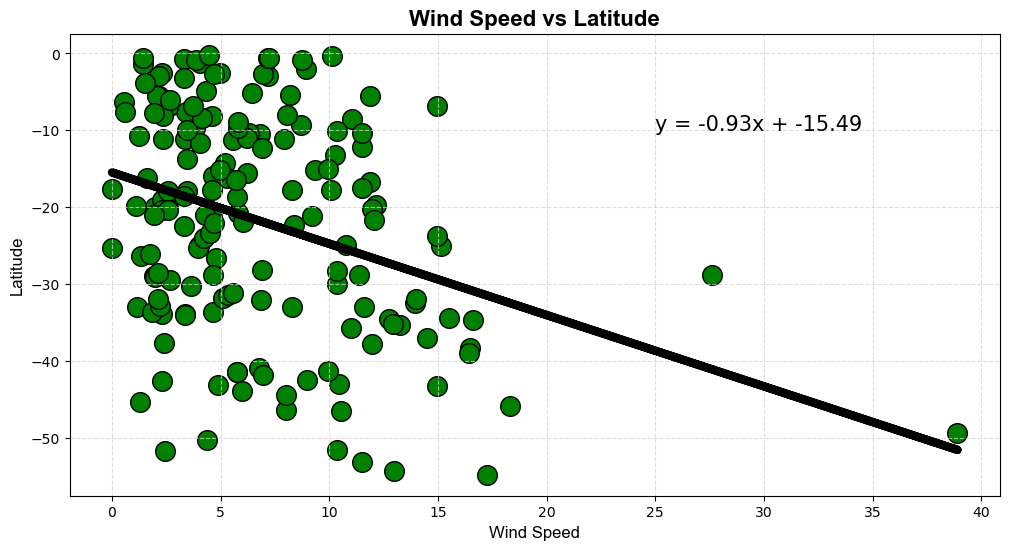

In [65]:
# Southern Hemisphere
x_values = southern_hemi_df["Wind Speed"]
y_values = southern_hemi_df.Lat
x_label = "Wind Speed"
y_label = "Latitude"
annotation = (25, -10)

regression_plot(x_values, y_values, x_label, y_label, annotation)

**Discussion about the linear relationship:** The relationship between the north and south with its wind speed and latitude vary substantially.In the north the wind speed increases with higher latitudes, whereas in the south its a sharper decrease in wind speed with higher latitudes.